In [198]:
import pidly
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib

# So I rewrote makeExamplePlots in python so I can pull some of the variables out of it, 
# I need to learn how to do this more efficiently directly from the IDL output
gal, file, phasecen, imageSize, chans2do, distance, rmsfac, vsys, specbox, posang, bardist, pvdthick, outputfits = makeExamplePlots()

# This is how you call IDL
idl = pidly.IDL('/Applications/idl/idl87/bin/idl')
# The following is how you get it to be aware of the astronomer's library
idl.func('EXPAND_PATH','<IDL_DEFAULT>:+/Users/beckynevin/idllib/')               
idl('!PATH = EXPAND_PATH("<IDL_DEFAULT>:+/Users/beckynevin/idllib")')
# Then you have to recompile readfits because grrrr
idl('.r readfits.pro')
idl('.r makeExamplePlots.pro')
# Finally call makeExamplePlots
# I want to figure out how to feed a bunch of variables directly to makeplots.pro
# through python but I haven't figured out how to do this yet.
idl('makeExamplePlots')
                #/Users/beckynevin/CfA_Code/CARS_data/Tim_Davis_IDL/makeplots')
#/Applications/idl/idl87/bin/idl')
#print(os.getcwd())
#os.chdir('Tim_Davis_IDL/makeplots')
print(os.getcwd())
#idl.pro('makeExamplePlots')


# Define all of these terms


STOP
'''gal = out[1]
file = out[2]
phasecen = out[3]'''

print(idl.reform(range(4), 2, 2))
idl.func('reform', range(4), 2, 2)
idl.pro('plot', range(10), range(10), xstyle=True, ystyle=True)

#idl.pro('!PATH = EXPAND_PATH("<IDL_DEFAULT>:+/Users/beckynevin/idllib")')
#pro makeplots,gal,file,phasecen,imageSize,
#chans2do,distance,rmsfac,vsys,specbox,
#posang,xrange=xrange,yrange=yrange,
#bardist=bardist,kpc=kpc,eps=eps,vrange=vrange,
#chanmapsize=chanmapsize,nsum=nsum,pvdthick=pvdthick,
#log=log,maxsigma=maxsigma,outputfits=outputfits
print('makeplots',gal,file,phasecen,
            imageSize,chans2do,distance,
            rmsfac,vsys,specbox,posang,'xrange, yrange,bardist,kpc,eps,vrange,chanmapsize,nsum,pvdthick,log,maxsigma,outputfits')



idl.pro('makeplots',gal,file,phasecen,
            imageSize,chans2do,distance,
            rmsfac,vsys,specbox,posang)

#,xrange=xrange, yrange=yrange, bardist=bardist, kpc=kpc,eps=eps,
#            vrange=vrange,chanmapsize=chanmapsize,nsum=nsum,pvdthick=pvdthick,log=log,maxsigma=maxsigma,outputfits=outputfits)
        
           #'xrange, yrange,bardist,kpc,eps,vrange,chanmapsize,nsum,pvdthick,log,maxsigma,outputfits')#,
#            'eps=eps,bardist=bardist,chanmapsize=chanmapsize,vrange=vrange,maxsigma=maxsigma,log=log,kpc=kpc,pvdthick=pvdthick,outputfits=outputfits')
idl.pro('makeplots, NGC4710, Tim_Davis_IDL/makeplots/NGC4710cube.fits, [65.0, 64.0], 50, [1, 42], 16.5, 1.5, 1102.0, [-20, 20, -30, 30], 207.0, xrange, yrange, bardist, kpc, eps, vrange, chanmapsize, nsum, pvdthick, log, maxsigma, outputfits' )       

/Users/beckynevin/CfA_Code/CARS_data/Tim_Davis_IDL/makeplots
bardist 2000
% Compiled module: READFITS.
% Compiled module: MAKEEXAMPLEPLOTS.
      602.000      1602.00
% Compiled module: MAKEPLOTS.
% Compiled module: SXPAR.
% Compiled module: GETTOK.
% Compiled module: VALID_NUM.
% READFITS: Now reading 129 by 129 by 44 by 1 array
% Compiled module: HEXTRACTCUBE.
% Compiled module: CHECK_FITS.
% Compiled module: FXPAR.
% Compiled module: SXADDPAR.
% Compiled module: STRN.
% Compiled module: SXADDHIST.
% Compiled module: EXTAST.
% Compiled module: REMCHAR.
% Compiled module: ZPARCHECK.
% Compiled module: GET_EQUINOX.
% Compiled module: DATE_CONV.
% Compiled module: YDN2MD.
% Compiled module: JULDATE.
% Compiled module: ROBUST_SIGMA.
RMS is      23.0606mJy
% Compiled module: SMOOTHMASK.
% Compiled module: MK_MOM0.
% Compiled module: STARTEPS.
% Compiled module: MAKE_COORDS.
% Compiled module: CGLOADCT.
% Compiled module: CGCOLORBAR.
% Compiled module: SETDEFAULTVALUE.
% Compiled module: C

error: (25, 'Inappropriate ioctl for device')

In [179]:
def make_coords(s,phasecen,mom0):
    x1=(np.arange(s[0])-phasecen[0])*abs(mom0[0].header['cdelt1'])*3600.
    y1=(np.arange(s[1])-phasecen[1])*abs(mom0[0].header['cdelt1'])*3600.
    #v1=((np.arange(s[2])-mom0[0].header['crpix3'])*(mom0[0].header['cdelt3'])) + mom0[0].header['crval3']
    #if v1[0] gt 1e9 then v1=(redshiftbackf(sxpar(hdrs,'RESTFRQ'),v1))
    #v1/=1e3
    return x1, y1#, v1


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'shade'


<Figure size 432x288 with 0 Axes>

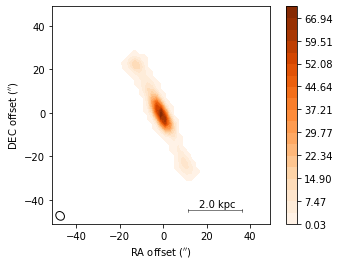

In [234]:



mom0 = pyfits.open('NGC4710_mom0.fits')

# Gotta get x1 and y1:
s=np.shape(mom0[0].data)
phasecen=[s[0]/2,s[1]/2]
coords = make_coords(s,phasecen,mom0)
x1 = coords[0]
y1 = coords[1]
X, Y = np.meshgrid(x1, y1)

#levels=rms*rmsfac + findgen(20.)*(max(mom0,/nan)-(rms*rmsfac))/20.
levels = [0.0345908,     0.386169,     0.737746,      1.08932,      1.44090,      1.79248,
      2.14406,      2.49564 ,     2.84721 ,     3.19879 ,     3.55037 ,     3.90195,
      4.25352 ,     4.60510    ,  4.95668 ,     5.30826 ,     5.65983,      6.01141,
      6.36299 ,     6.71457]

# Make a new array of levels starting at the rms min
levels = np.linspace(levels[0], np.max(mom0[0].data), 20)

import matplotlib.pyplot as plt
plt.clf()
fig=plt.figure()
ax = fig.add_subplot(111)
cont = ax.contourf(X, Y, mom0[0].data, cmap='Oranges', shade=False, levels=levels)
plt.colorbar(cont)

e = matplotlib.patches.Ellipse((x1[0]+(mom0[0].header['bmaj'])*3600.*0.85, y1[0]+(mom0[0].header['bmaj'])*3600.*0.85),mom0[0].header['BMAJ']*3600, mom0[0].header['BMIN']*3600, mom0[0].header['bpa']+90)
ax.add_artist(e)
e.set_facecolor('None')
e.set_edgecolor('black')
ax.set_aspect('equal')
ax.set_xlabel('RA offset ($^{\prime\prime}$)')
ax.set_ylabel('DEC offset ($^{\prime\prime}$)')

# Making the kpc label:
#oplot,[!x.crange[1]-1.5*bardist2,!x.crange[1]-0.5*bardist2],
#[!y.crange[0]+0.25*bardist2,!y.crange[0]+0.25*bardist2],color=0
xsize = np.shape(mom0[0].data)[0]
#bardist=(round((distance*4.84*(xsize))/(4.*5.))*5.)
bardist2=bardist/(distance*4.84)
xs = [x1[-1] - 1.5*bardist2, x1[-1]-0.5*bardist2]
ys = [y1[0]+0.25*bardist2,y1[0]+0.25*bardist2]

plt.plot(xs, ys, color='black', lw=0.5)

xs = [x1[-1] - 1.5*bardist2, x1[-1]-1.5*bardist2]
ys = [y1[0]+0.9*0.25*bardist2,y1[0]+1.1*0.25*bardist2]
plt.plot(xs, ys, color='black', lw=0.5)

xs = [x1[-1] - 0.5*bardist2, x1[-1]-0.5*bardist2]
ys = [y1[0]+0.9*0.25*bardist2,y1[0]+1.1*0.25*bardist2]
plt.plot(xs, ys, color='black', lw=0.5)

# Now label as the number of kpc:
#xyouts,!x.crange[1]-1.0*bardist2,!y.crange[0]+0.3*bardist2,strcompress(string(bardist/1e3,format='(I10)'),/rem)+" kpc",ALIGNMENT=0.5,color=0
ax.annotate( str(round(bardist/1e3,0))+' kpc', xy=(x1[-1]-1.3*bardist2, y1[0]+0.3*bardist2))
plt.savefig('/Users/beckynevin/CfA_Code/CARS_data/python_plots/mom0.png', dpi=1000)


In [ ]:
# I think I would really like to be able to call idl through python
# so that I don't have to redo any of these analysis steps

In [9]:
import numpy as np

def make_coords(s,phasecen,hdrs,x1,y1,v1)
    x1=(findgen(s[1])-phasecen[0])*abs(sxpar(hdrs,'cdelt1')*3600.)
    y1=(findgen(s[2])-phasecen[1])*abs(sxpar(hdrs,'cdelt2')*3600.)
    v1=((findgen(s[3])-sxpar(hdrs,'crpix3'))*(sxpar(hdrs,'cdelt3'))) + sxpar(hdrs,'crval3')
    if v1[0] > 1e9:
        v1=(redshiftbackf(sxpar(hdrs,'RESTFRQ'),v1))
    v1/=1e3


def mk_spec(f,hdrs,rms,box,rmsfac,vsys,_extra,eps,file,phasecen,gal,nsum,distance,chans2do,fits):
  #starteps,file=file,eps=eps ;;; plot to X window or EPS, depending on inputs
  #cgloadct,39
    if not rmsfac then rmsfac==3.

  

    s=np.shape(f)
    if not keyword_set(phasecen) then phasecen=[s[1]/2,s[2]/2]
    make_coords,s,phasecen,hdrs,x1,y1,v1

  wx=where(x1 ge box[0] and x1 le box[1])
  wy=where(x1 ge box[2] and x1 le box[3])
  box=cube[wx[0]:wx[-1],wy[0]:wy[-1],*]
  spec=total(total(box,1,/nan),1,/nan)
  sbox=size(box)

  psf=psf_gaussian(Npixel=[sbox[1],sbox[2]],fwhm=[sxpar(hdrs,'bmaj')/sxpar(hdrs,'cdelt1'),sxpar(hdrs,'bmin')/sxpar(hdrs,'cdelt1')],NDIMEN=2,/double)

  if total(psf) eq 0 then begin
        psf=1e3
        ytitle="Flux Density (mJy/beam)"
  endif else ytitle="Flux (mJy)"



  vsysest=total(spec[chans2do[0]:chans2do[1]]*v1[chans2do[0]:chans2do[1]],/nan)/(total(spec[chans2do[0]:chans2do[1]],/nan))
  print,"vsys est:",vsysest
  if not keyword_set(vsys) then vsys=vsysest
  xrange=[-1000,1000]+vsys
  yrange=[min(spec/total(psf),/nan)-rms,max(spec/total(psf),/nan)+rms]*1e3

  plot,v1,spec/total(psf)*1e3,psym=10,color=0,background=255,charsize=1.5,xtitle="Velocity (km/s)",/xstyle,_extra=_extra,ytitle=ytitle,yrange=yrange,xrange=xrange,/ystyle,nsum=nsum

  endeps,eps=eps,file=file

  w=where(v1 ge min(v1[chans2do]) and v1 le max(v1[chans2do]))
  totflux=total((spec[w]/total(psf)))*abs(v1[1]-v1[0]);
  print,"Total flux:",totflux," Jy km/s"
  print,"Assuming you are observing CO(1-0):"
  print,"H2mass (Xco=3e20):",alog10(3.93e-17*3e20*(distance^2)*total(totflux))," Msun


  if keyword_set(fits) then makefits,spec/total(psf),hdrs,fits,"spec",vels=v1

def plot_helpers(specbox,pvdthick,hdr,posang):
        oplot,specbox[0:1],[specbox[2],specbox[2]],color=0
        oplot,specbox[0:1],[specbox[3],specbox[3]],color=0
        oplot,[specbox[0],specbox[0]],specbox[2:3],color=0
        oplot,[specbox[1],specbox[1]],specbox[2:3],color=0
    ypv=!y.crange
    xpv=[0,0]+(pvdthick*abs(sxpar(hdr,'cdelt1')*3600.))
    xpv2=[0,0]-(pvdthick*abs(sxpar(hdr,'cdelt1')*3600.))
    ang=(-1)*posang
    c = cos((ang)/!radeg)
    s = sin((ang)/!radeg)
    x2 =  c*xpv + s*ypv
    y2 = -s*xpv + c*ypv
    x3 =  c*xpv2 + s*ypv
    y3 = -s*xpv2 + c*ypv
    oplot,x2,y2,color=0
    oplot,x3,y3,color=0
    oplot,[0],[0],psym=1,color=0


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 23)

In [60]:
def makeExamplePlots():#eps=eps
    print(os.getcwd())
    #;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
    gal=  'NGC4710'                             #;;; name of your object - for output files
    file= "Tim_Davis_IDL/makeplots/NGC4710cube.fits"            #;;; path to your observed datacube

    distance=16.5                                   #;;; Distance to your object in Mpc - for scale bars
    bardist=2000                                    #;;; Size of the scale bars, in PARSECS
    kpc=1                                                   #;;; Flag for units in the scale bar - kpc=1 --> kiloparsecs, kpc=0 --> parsecs

    vsys=1102.                                              #;;; Systemic velocity of your object, in km/s
    posang=207.                                             #;;; Position angle of the major axis, in degrees

    phasecen=[65.,64.]                              #;;; Phase Centre of your Cube in PIXELS. The place to call 0,0
    imageSize=50                                    #;;; How big the area you wish to image is in PIXELS around your phasecentre
    chans2do=[1,42]                                 #;;; Which channel range contains flux from your object? [startChan, endChan]
    chanmapsize=[6,7]                               #;;; How many plots you want in your channel maps in the X and Y directions. Needs to be large enough to fit them all in!


    specbox=[-20,20,-30,30]                 #;;; How big an area to include when creating your spectrum in ARCSECONDS [xmin,xmax,ymin,ymax]
    vrange=[-500+vsys,500+vsys]        #;;; Velocity range to plot in your spectrum

    maxsigma=0                                              #;;; Clip the moment two display to some maximum value, to avoid noise peaks creating range issues.
    log=0                                                   #;;; Flag for plotting the moment zero with a logarithmic scale. True = log it, False =dont
    pvdthick=2.                                             #;;; How thick a cut to make when creating the PVD in PIXELS. Usually pick at least one beam width.

    rmsfac=1.5                                              #;;; RMS clip to apply in the SMOOTH MASK.

    outputfits=0                                    #;;; Output FITS files of the produced moments? True=yes, False=no
    #;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
    return gal, file, phasecen, imageSize, chans2do, distance, rmsfac,vsys,specbox,posang, bardist, pvdthick, outputfits
    #makeplots(gal,file,phasecen,imageSize,chans2do,distance,rmsfac,vsys,specbox,posang, bardist, pvdthick, outputfits)
    #eps=eps,bardist=bardist,chanmapsize=chanmapsize,vrange=vrange,maxsigma=maxsigma,log=log,kpc=kpc,pvdthick=pvdthick,outputfits=outputfits

    
    
def makeplots(gal,file,phasecen,imageSize,chans2do,distance,rmsfac,vsys,specbox,posang, bardist, pvdthick, outputfits):
    #,xrange=xrange,yrange=yrange,bardist=bardist,kpc=kpc,eps=eps,vrange=vrange,chanmapsize=chanmapsize,nsum=nsum,pvdthick=pvdthick,log=log,maxsigma=maxsigma,outputfits=outputfits
    if bardist==0:
        bardist=1000.
    if pvdthick==0:
        pvdthick=2.
    fdata=pyfits.open(file)#,hdr)
    s=np.shape(fdata)
    halfsize=imageSize/2.
    if outputfits==1: 
        fits=gal

      #;;;; Sometimes CASA does strange things with the beam, so check and deal with this
    '''if sxpar(hdr,'CASAMBM'):
        beamtab=mrdfits(file,1)
        sxaddpar,hdr,'BMAJ', mean(beamtab.bmaj)/3600.
        sxaddpar,hdr,'BMIN', mean(beamtab.bmin)/3600.
        sxaddpar,hdr,'BPA', mean(beamtab.bpa)'''
      

    #HEXTRACTCUBE(fdata, hdr, fnew, newhdr, phasecen[0]-halfsize, phasecen[0]+halfsize,phasecen[1]-halfsize,phasecen[1]+halfsize, verbose=False)

    phasecen=[halfsize,halfsize] #;;; Now the phasecen is the centre by construction
    #fdata=fnew
    #hdr=newhdr
    s=np.shape(fdata)

    RMS=robust_sigma(fdata[:,:,(chans2do[0]-2)>0:chans2do[0]])
    print,"RMS is",RMS/1e-3,"mJy"
    s=size(fdata)

    mask=smoothmask(fdata,rms*rmsfac,1.5*abs(sxpar(hdr,'bmaj')/sxpar(hdr,'cdelt1')),4.0)

    mk_mom0(fdata,hdr,rms,mask)
        #rmsfac=rmsfac,xrange=xrange,yrange=yrange,file=gal+"_mom0",eps=eps,phasecen=phasecen,dist=distance,bardist=bardist,kpc=kpc,log=log,fits=fits,chans2do=chans2do


    '''
      meep=""
      if not keyword_set(eps) then read,meep


      mk_mom1,fdata,hdr,rms,mask,rmsfac=rmsfac,xrange=xrange,yrange=yrange,dv=dv,file=gal+"_mom1",eps=eps,phasecen=phasecen,dist=distance,bardist=bardist,kpc=kpc,vsys=vsys,chans2do=chans2do,fits=fits

      if not keyword_set(eps) then plot_helpers,specbox,pvdthick,hdr,posang

      meep=""
      if not keyword_set(eps) then read,meep

      mk_mom2,fdata,hdr,rms,mask,rmsfac=rmsfac,xrange=xrange,yrange=yrange,dv=dv,file=gal+"_mom2",eps=eps,phasecen=phasecen,dist=distance,bardist=bardist,kpc=kpc,vsys=vsys,chans2do=chans2do,maxsigma=maxsigma,fits=fits

      meep=""
      if not keyword_set(eps) then read,meep

        mk_spec,fdata,hdr,rms,rmsfac=0.0001,vsys=vsys,file=gal+"_spec",eps=eps,box=specbox,phasecen=phasecen,/ystyle,gal=gal,chans2do=chans2do,xrange=vrange,nsum=nsum,dist=distance,fits=fits

        meep=""
          if not keyword_set(eps) then read,meep

          mk_pvd,fdata,hdr,rms,posang,mask,rmsfac=rmsfac,vsys=vsys,chans2do=[(chans2do[0]-10)>0 ,(chans2do[1]+10)<s[3]-1],phasecen=[halfsize,halfsize],dist=distance,bardist=bardist,kpc=kpc,eps=eps,file=gal+"_PVD",xrange=xrange,specialclip=specialclip,pvdthick=pvdthick,fits=fits

          meep=""
          if not keyword_set(eps) then read,meep

          if not keyword_set(chanmapsize) then chanmapsize=[ceil(sqrt(chans2do[1]-chans2do[0])),ceil(sqrt(chans2do[1]-chans2do[0]))]
          mk_chanmap,fdata,hdr,rms,chanmapsize,rmsfac=rmsfac,xrange=xrange,yrange=yrange,file=gal+"chanmap",eps=eps,vsys=vsys,chans2do=chans2do,phasecen=phasecen,rev=rev


    '''


print('compiled')

compiled


In [42]:
import os
import pyfits
import numpy as np
makeExamplePlots()

/Users/beckynevin/CfA_Code/CARS_data


NameError: name 'robust_sigma' is not defined

In [ ]:
def mk_mom0(f,hdrs,rms,mask):
    #;;; Make moment zero (integrated intensity)
    starteps,file=file,eps=eps ;;; plot to X window or EPS, depending on inputs

    cube=f #;;; Copy input file (so changes dont cause issues)

    cube*=mask

  ;;;; If you want to clip the cube region to consider, do this here

  if keyword_set(chans2do) then begin
   cube=cube[*,*,chans2do[0]:chans2do[1]]
  endif else begin
   chans2do=[0,0]
  endelse

  ;;; Create zeorth moment!
  mom0=total(cube,3)


  ;;; Create X-Y vectors
  s=size(mom0)
  if not keyword_set(phasecen) then phasecen=[s[1]/2,s[2]/2]
  make_coords,s,phasecen,hdrs,x1,y1,v1

  ;; Log if required
  if keyword_set(log) then begin
        mom0=alog10(mom0)
    levels=alog10(rms*rmsfac) + findgen(20.)*(max(mom0,/nan)-alog10(rms*rmsfac))/20.
  endif else  levels=rms*rmsfac + findgen(20.)*(max(mom0,/nan)-(rms*rmsfac))/20.


  ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;; Do Plotting ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
  cgloadct,3,/rev ;;; Load colour table
  contour,mom0,x1,y1,levels=levels,background=0,color=255,/fill,/nodata,/iso,_extra=_extra,charsize=1.5,xtitle='RA of$
  cgloadct,3,/rev,clip=[30,230]
  contour,mom0,x1,y1,levels=levels,background=0,color=255,/cell_fill,/overplot,_extra=_extra
  cgloadct,0
  ellipse, 0.5*sxpar(hdrs,'bmaj')*3600., 0.5*sxpar(hdrs,'bmin')*3600., sxpar(hdrs,'bpa')+90, 0,360, !x.crange[0]+(sxp$

   ;;; make distbar
  if keyword_set(dist) then begin
        if NOT keyword_set(bardist) then        bardist=(round((dist*4.84*(!x.crange[1]-!x.crange[0]))/(4.*5.))*5.);/$
        bardist2=bardist/(dist*4.84)
        oplot,[!x.crange[1]-1.5*bardist2,!x.crange[1]-0.5*bardist2],[!y.crange[0]+0.25*bardist2,!y.crange[0]+0.25*bar$
        oplot,[!x.crange[1]-1.5*bardist2,!x.crange[1]-1.5*bardist2],[!y.crange[0]+0.9*0.25*bardist2,!y.crange[0]+1.1*$
    oplot,[!x.crange[1]-0.5*bardist2,!x.crange[1]-0.5*bardist2],[!y.crange[0]+0.9*0.25*bardist2,!y.crange[0]+1.1*0.25$
  if keyword_set(kpc) then begin
         xyouts,!x.crange[1]-1.0*bardist2,!y.crange[0]+0.3*bardist2,strcompress(string(bardist/1e3,format='(I10)'),/r$
         endif else xyouts,!x.crange[1]-1.0*bardist2,!y.crange[0]+0.3*bardist2,strcompress(string(bardist,format='(I1$
  endif
  axis,xaxis=0,color=0,/xstyle,xrange=!x.crange,xtickname=replicate(' ',10)
  axis,xaxis=1,color=0,/xstyle,xrange=!x.crange,xtickname=replicate(' ',10)
  axis,yaxis=0,color=0,/ystyle,yrange=!y.crange,ytickname=replicate(' ',10)
  axis,yaxis=1,color=0,/ystyle,yrange=!y.crange,ytickname=replicate(' ',10)
  ;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;$

  endeps,eps=eps,file=file

  if keyword_set(log) then mom0=10^mom0
  if keyword_set(fits) then makefits,mom0,hdrs,fits,0,clip=rms*rmsfac
    return rmsfac,_extra,eps,file,phasecen,dist,bardist
